<a href="https://colab.research.google.com/github/vanthienquangle/ACM-Industry-Workshop/blob/main/ACM_AI_Stock_Forcasting_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# dataset @ https://finance.yahoo.com/quote/MSFT/history/

In [2]:
import pandas as pd

df = pd.read_csv('MSFT.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.059946,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.062087,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.063158,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.061552,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.060482,47894400
...,...,...,...,...,...,...,...
9685,2024-08-19,418.959991,421.750000,416.459991,421.529999,421.529999,15234000
9686,2024-08-20,421.700012,425.859985,421.640015,424.799988,424.799988,16387600
9687,2024-08-21,424.079987,426.399994,421.720001,424.140015,424.140015,16067300
9688,2024-08-22,424.359985,426.790009,414.609985,415.549988,415.549988,19361900


In [3]:
df = df[["Date", "Close"]]
df

,Date,Close
0,1986-03-13,0.097222
1,1986-03-14,0.100694
2,1986-03-17,0.102431
3,1986-03-18,0.099826
4,1986-03-19,0.098090
...,...,...
9685,2024-08-19,421.529999
9686,2024-08-20,424.799988
9687,2024-08-21,424.140015
9688,2024-08-22,415.549988


In [30]:
import datetime

#use in order to show the associated datetime
def convert_str_to_datetime(s):
  split = s.split('-')
  return datetime.datetime(int(split[0]), int(split[1]), int(split[2]))

datetime_object = convert_str_to_datetime('2010-01-04')
datetime_object

datetime.datetime(2010, 1, 4, 0, 0)

In [5]:
df

,Date,Close
0,1986-03-13,0.097222
1,1986-03-14,0.100694
2,1986-03-17,0.102431
3,1986-03-18,0.099826
4,1986-03-19,0.098090
...,...,...
9685,2024-08-19,421.529999
9686,2024-08-20,424.799988
9687,2024-08-21,424.140015
9688,2024-08-22,415.549988


In [31]:
df['Date'] = df['Date'].apply(convert_str_to_datetime)
df['Date']

KeyError: 'Date'

In [13]:
df.index = df.pop("Date")

KeyError: 'Date'

In [14]:
df

,Close
Date,
1986-03-13,0.097222
1986-03-14,0.100694
1986-03-17,0.102431
1986-03-18,0.099826
1986-03-19,0.098090
...,...
2024-08-19,421.529999
2024-08-20,424.799988
2024-08-21,424.140015


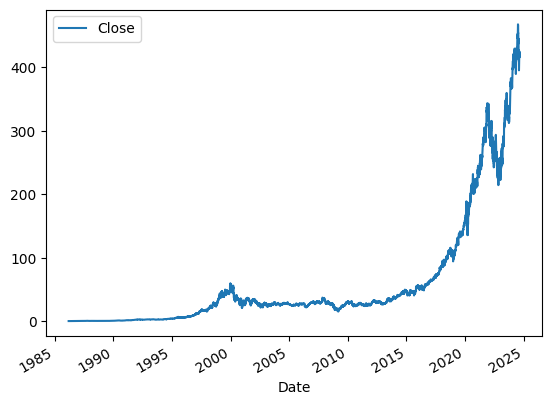

In [15]:
import matplotlib.pyplot as plt

df.plot()
plt.show()

#or plt.plt(df.index, df["Close"])

In [16]:
#What it really does is to using the first three days in order to predict for the last days
# 4-days equation
import numpy as np

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date

  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)

    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))

    if last_time:
      break

    target_date = next_date

    if target_date == last_date:
      last_time = True

  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates

  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]

  ret_df['Target'] = Y

  return ret_df

# Start day second time around: '2021-03-25'
windowed_df = df_to_windowed_df(df,
                                '2021-03-25',
                                '2022-03-23',
                                n=3)
windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,2021-03-25,235.990005,237.580002,235.460007,232.339996
1,2021-03-26,237.580002,235.460007,232.339996,236.479996
2,2021-03-29,235.460007,232.339996,236.479996,235.240005
3,2021-03-30,232.339996,236.479996,235.240005,231.850006
4,2021-03-31,236.479996,235.240005,231.850006,235.770004
...,...,...,...,...,...
247,2022-03-17,276.440002,287.149994,294.390015,295.220001
248,2022-03-18,287.149994,294.390015,295.220001,300.429993
249,2022-03-21,294.390015,295.220001,300.429993,299.160004
250,2022-03-22,295.220001,300.429993,299.160004,304.059998


In [17]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((252,), (252, 3, 1), (252,))

This next step will help to split into training, validation, testing parts

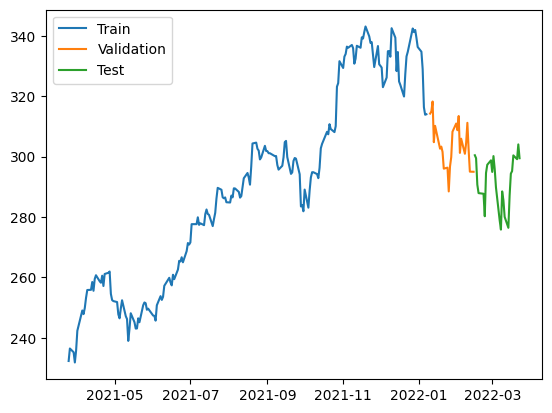

In [18]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam #optimizer purposes
from tensorflow.keras import layers

model = Sequential([layers.Input((3, 1)), #3 days in the past, only 1 feature
                    layers.LSTM(64), #the bigger the more complicated
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse', #to compile the function, we need loss feature
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error']) #tell us how much we are off by or the efficiency

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100) #100 runs per dataset

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - loss: 83701.3750 - mean_absolute_error: 287.6024 - val_loss: 92419.6172 - val_mean_absolute_error: 303.9189
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 83672.4766 - mean_absolute_error: 287.3241 - val_loss: 92246.6875 - val_mean_absolute_error: 303.6342
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 84263.3516 - mean_absolute_error: 288.5294 - val_loss: 92074.1719 - val_mean_absolute_error: 303.3499
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 82698.0391 - mean_absolute_error: 285.8232 - val_loss: 91861.4219 - val_mean_absolute_error: 302.9991
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 85218.8125 - mean_absolute_error: 290.2179 - val_loss: 91534.5078 - val_mean_absolute_error: 302.4592
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 81850.0703 - mean_absolute_error: 284.4102 - val_loss: 91090.1406 - val_mean_absolute_error: 301.7237
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


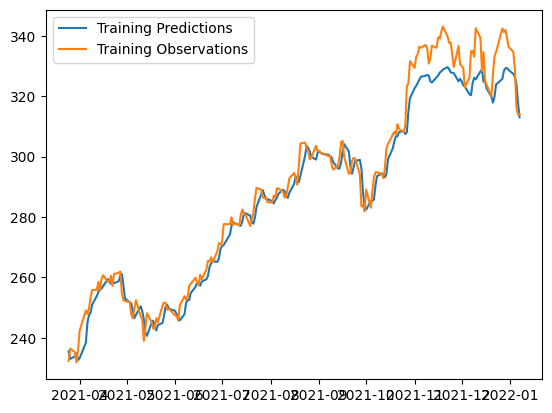

In [27]:
train_predictions = model.predict(X_train).flatten() #flatten() function is used to convert the data into an array

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


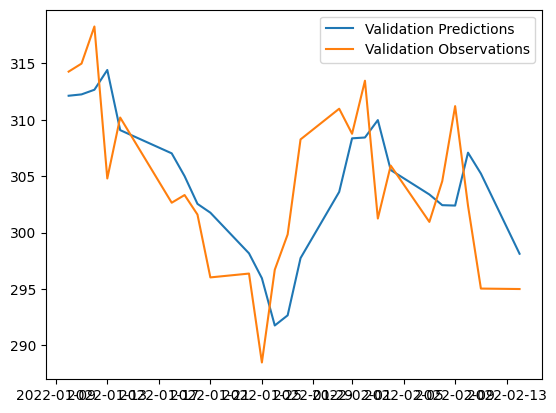

In [21]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


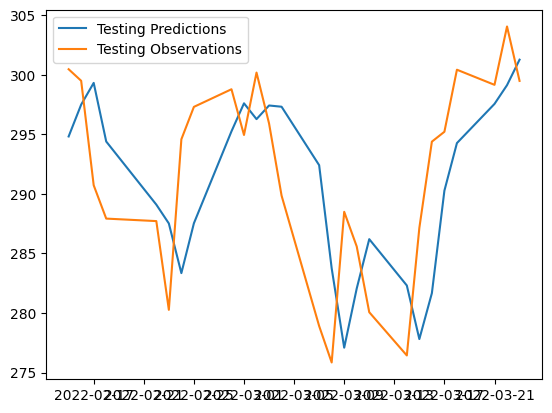

In [22]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

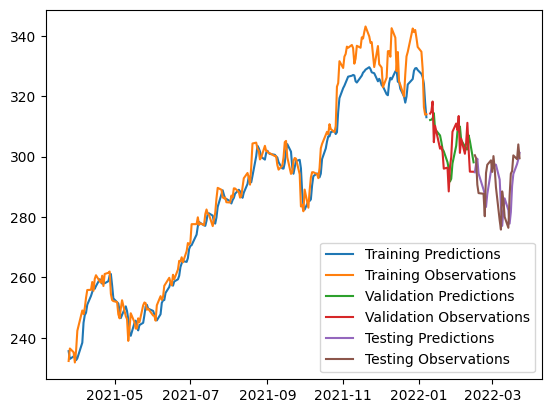

In [23]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations'])

In [29]:
#because the model can only train by using first three previous dates so we need to make a
#recursive function out of it to predict the far future of it
from copy import deepcopy

recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])

for target_date in recursive_dates:
  last_window = deepcopy(X_train[-1])
  next_prediction = model.predict(np.array([last_window])).flatten()
  recursive_predictions.append(next_prediction)
  last_window[-1] = next_prediction # means that it keeps taking the lastest value to predict

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━

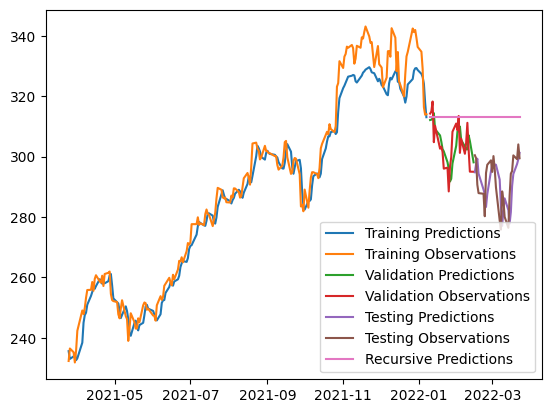

In [25]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations',
            'Recursive Predictions'])